<a href="https://colab.research.google.com/github/amitfire/EDA-for-Data-Science-Projects/blob/master/Tele%3DCalling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Importing all the important libraries for data preprocessing and visualisation.
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# Importing google colab as using colab notebook for data import and EDA.
from google.colab import files
import io
uploaded =  files.upload()
lead_calls = pd.read_csv(io.BytesIO(uploaded['lead_calls.csv']))
lead_calls.head()

Saving lead_calls.csv to lead_calls.csv


,id,telecallerId,leadId,client,status,comments,calledAt,createdAt
0,00028a99-c401-4048-9b75-b923cff55a79,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,724467a5-52d1-4989-a870-99ae65d3e0e8,Amazon Flex,Not Interested - Applied by Mistake,NaN,2019-07-25T17:00:00Z,2019-12-26T17:32:49.297Z
1,00033b17-3a2a-4769-8623-bb00adf1e4c5,4248b521-ce3f-4897-a30d-35c9ee81f746,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,NaN,2019-10-10T17:30:00Z,2019-12-26T18:09:38.408Z
2,0003dcc7-05d0-4736-a415-5e67ea95c24e,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,fea7fb85-3355-4747-98fd-dae1b9aca52a,Lalamove,Not Interested - Disconnected the Call,NaN,2019-08-30T14:00:00Z,2019-12-26T17:42:55.007Z
3,00042f93-1e19-418f-bf38-1a8a8f758952,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,3308d114-a9ed-4d81-8d08-50b28171790f,Zomato,Not Interested,Not Looking for Job,2020-06-01T10:30:00Z,2019-12-26T17:26:36.333Z
4,0006f07e-f4d1-4387-8540-fc8bf6e67676,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,924cdffb-693f-4870-8179-d80571e1fc85,NaN,Not Applied,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:12.255Z


In [2]:

uploaded =  files.upload()
leads = pd.read_csv(io.BytesIO(uploaded['leads.csv']),encoding='ISO-8859-1')
leads.head()

Saving leads.csv to leads.csv


,id,userId,name,phoneNumber,city,state,source,isExternal,createdAt,receivedAt
0,00021a29-83e4-48d3-8cc3-0bc729f087fd,NaN,KUPENDRA,1234567890,NaN,NaN,Airavatha data,True,2019-12-26T18:17:13.115Z,2019-11-01T05:41:00Z
1,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,e50fccfe-82aa-434a-ad92-9d3f9d651f84,Dinkle Unknown,1234567890,Delhi/NCR,Delhi-NCR,delhi-18-33yo-10-15k-hdat-july-17,False,2019-12-26T17:49:53.471Z,2019-08-25T00:00:00Z
2,0013dc91-e0e3-48f6-9518-6cf8389dd923,NaN,Elikatte Kumaraswamy,1234567890,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-12-26T17:21:04.021Z,2019-07-25T00:00:00Z
3,001477a2-80d0-4b6d-a392-16aeaeef805d,4e0222f0-42aa-4660-976b-8e9329b4b1a7,Raju Unknown,1234567890,Hyderabad,Telangana,Referrals,False,2019-12-26T17:26:31.459Z,2019-06-03T00:00:00Z
4,0014961d-9b66-4cae-85aa-acb89cd51f1e,NaN,Arunkumar Unknown,1234567890,Bangalore,Karnataka,Reused Leads,False,2019-12-26T17:21:05.065Z,2019-04-01T00:00:00Z


In [0]:
leads['diff_cre_rec'] = pd.to_datetime(leads['createdAt'])-pd.to_datetime(leads['receivedAt'])

In [190]:
leads.head()

,id,userId,name,phoneNumber,city,state,source,isExternal,createdAt,receivedAt,diff_cre_rec
0,00021a29-83e4-48d3-8cc3-0bc729f087fd,NaN,KUPENDRA,1234567890,NaN,NaN,Airavatha data,True,2019-12-26T18:17:13.115Z,2019-11-01T05:41:00Z,55 days 12:36:13.115000
1,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,e50fccfe-82aa-434a-ad92-9d3f9d651f84,Dinkle Unknown,1234567890,Delhi/NCR,Delhi-NCR,delhi-18-33yo-10-15k-hdat-july-17,False,2019-12-26T17:49:53.471Z,2019-08-25T00:00:00Z,123 days 17:49:53.471000
2,0013dc91-e0e3-48f6-9518-6cf8389dd923,NaN,Elikatte Kumaraswamy,1234567890,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-12-26T17:21:04.021Z,2019-07-25T00:00:00Z,154 days 17:21:04.021000
3,001477a2-80d0-4b6d-a392-16aeaeef805d,4e0222f0-42aa-4660-976b-8e9329b4b1a7,Raju Unknown,1234567890,Hyderabad,Telangana,Referrals,False,2019-12-26T17:26:31.459Z,2019-06-03T00:00:00Z,206 days 17:26:31.459000
4,0014961d-9b66-4cae-85aa-acb89cd51f1e,NaN,Arunkumar Unknown,1234567890,Bangalore,Karnataka,Reused Leads,False,2019-12-26T17:21:05.065Z,2019-04-01T00:00:00Z,269 days 17:21:05.065000


In [191]:
uploaded =  files.upload()
tele = pd.read_csv(io.BytesIO(uploaded['telecallers.csv']))
tele.head()

KeyError: ignored

### After Importing the data set we can see that:
### We have been given three tables 
### 1. leads
### 2. lead_calls
### 3. telecallers .
### Lets look into each one by one.

In [192]:
# Check the dimensions of each tables

leads.shape,lead_calls.shape,tele.shape

((9916, 11), (12335, 13), (5, 4))

In [193]:

#Getting the information about the data types involved in the table
leads.info(),lead_calls.info(),tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9916 entries, 0 to 9915
Data columns (total 11 columns):
id              9916 non-null object
userId          6073 non-null object
name            9916 non-null object
phoneNumber     9916 non-null int64
city            9178 non-null object
state           8536 non-null object
source          9914 non-null object
isExternal      9916 non-null bool
createdAt       9916 non-null object
receivedAt      9916 non-null object
diff_cre_rec    9916 non-null timedelta64[ns]
dtypes: bool(1), int64(1), object(8), timedelta64[ns](1)
memory usage: 784.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 13 columns):
id              12335 non-null object
telecallerId    12335 non-null object
leadId          12335 non-null object
client          11491 non-null object
status          12335 non-null object
comments        3521 non-null object
calledAt        12335 non-null datetime64[ns, UTC]
createdAt   

(None, None, None)

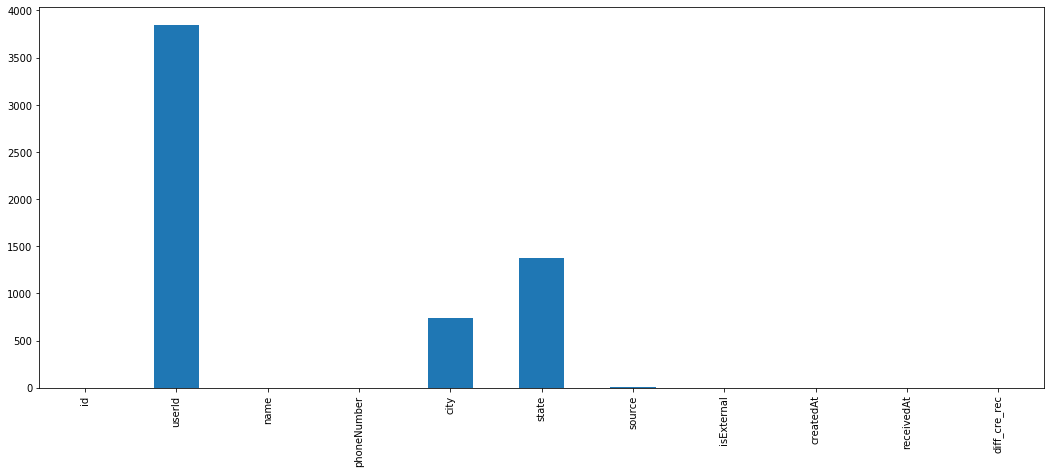

In [194]:
#Missing values present in the leads table
leads.isna().sum().plot.bar()


### As we can see that user id has more than 3500 missing values.Also its a foreign key to the internal users table. Thus ,removing it for the analysis.

In [195]:
leads1 = leads.drop('userId',axis=1)  # Dropping the userID column.
leads1.columns

Index(['id', 'name', 'phoneNumber', 'city', 'state', 'source', 'isExternal',
       'createdAt', 'receivedAt', 'diff_cre_rec'],
      dtype='object')

In [8]:
   # Checking for the duplicate values.

,id,name,phoneNumber,city,state,source,isExternal,createdAt,receivedAt


### We can see that there are not any duplicate values.

In [9]:
%matplotlib inline
plt.figure(figsize=(15,6))

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

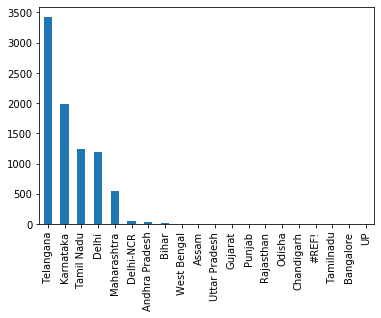

In [10]:
leads1['state'].value_counts().plot.bar()

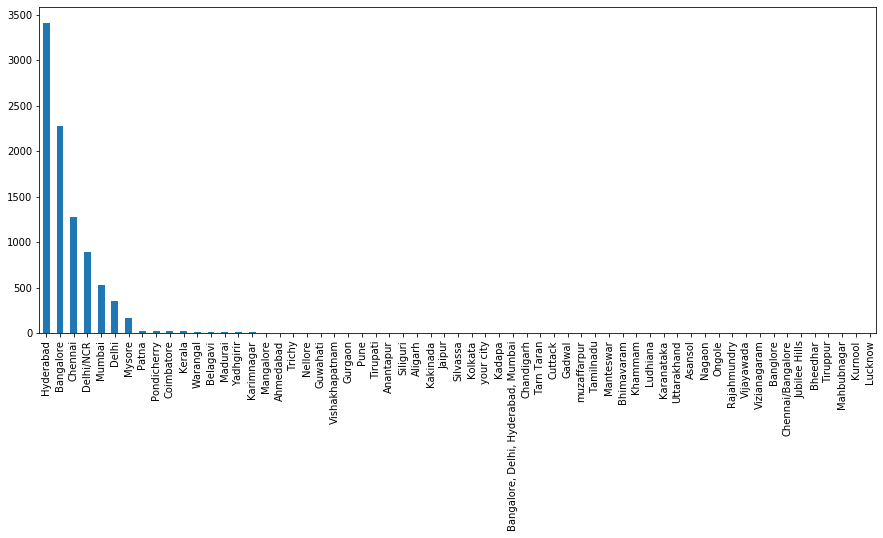

In [11]:
plt.figure(figsize=(15,6))
leads1['city'].value_counts().plot.bar()

In [0]:
pd.set_option('display.max_rows', 100)
pd.DataFrame(leads1['city'].value_counts())

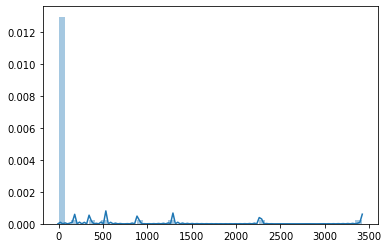

In [13]:
sns.distplot(leads1['city'].value_counts().values)

In [0]:
#Getting those data points which donot have city as well as state as not available in the data set.

leads1 = leads1[~((leads1['city'].isna()==True)&((leads1['state'].isna()==True)))]

In [197]:
leads1.shape

(9198, 10)

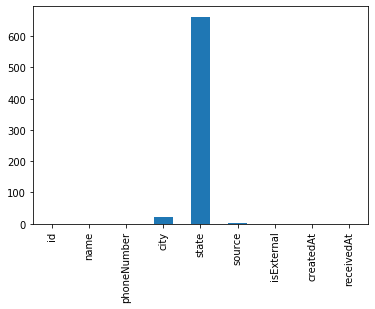

In [16]:
leads1.isna().sum().plot.bar()

In [0]:
missing_states =leads1[(leads1['city'].isna()==False)&((leads1['state'].isna()==True))]['city'].value_counts().index

In [0]:
missing_cities = leads1[(leads1['city'].isna()==True)&((leads1['state'].isna()==False))]['state'].value_counts().index

In [200]:
missing_cities

Index(['Karnataka'], dtype='object')

## Hence we can easily impute city and state features .By figuring out the corresponding state for the city .

In [201]:
leads1[leads1['city']=='Bangalore']['state'].value_counts().index[0]

'Karnataka'

In [0]:
dict_city_state = {}
for i in missing_states:
  if len(leads1[leads1['city']==i]['state'].value_counts().index)>0:
    dict_city_state[i]=leads1[leads1['city']==i]['state'].value_counts().index[0]
  else:
    dict_city_state[i] =i


In [0]:
leads1[(leads1['city'].isna()==False)&((leads1['state'].isna()==True))]
#leads1[(leads1['state'].isna()==True)& (leads1['city'].isna()==False) ]['state']
leads1.state = leads1.state.fillna(leads1.city.map(dict_city_state))


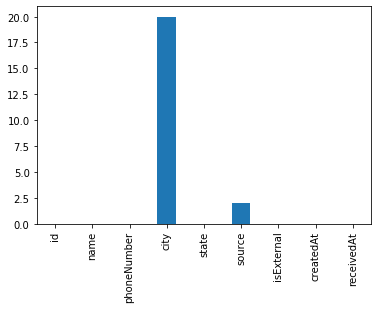

In [23]:
leads1.isna().sum().plot.bar()

## Thus we have imputed state with the corresponding value of state from the help of city .Also only missing city has corresponding state as Karnataka. Thus Assuming 'Bengaluru' as imputing value.

In [0]:
leads1['city'] = leads1['city'].fillna('Bangalore')

In [205]:
leads1.isna().sum()

id              0
name            0
phoneNumber     0
city            0
state           0
source          2
isExternal      0
createdAt       0
receivedAt      0
diff_cre_rec    0
dtype: int64

## Thus we have Handled  almost all missing values and imputed it with right values.

In [0]:
leads1 = leads1.dropna()

In [207]:
pd.set_option('display.max_rows', 200)

plt.figure(figsize=(15,5))
leads1['source'] = leads1['source'].apply(lambda x:'Quikr' if 'quikr'in x.lower() else x)

<Figure size 1080x360 with 0 Axes>

In [0]:
leads1['source'] = leads1['source'].apply(lambda x:'Delhi' if 'delhi'in x.lower() else x)

In [0]:
leads1['source'] = leads1['source'].apply(lambda x:'Facebook' if 'fb'in x.lower() else x)

In [0]:
leads1['source'] = leads1['source'].apply(lambda x:'BLR' if 'blr'in x.lower() else x)

In [0]:
leads1['source'] = leads1['source'].apply(lambda x:'Reused Leads' if 'reuse'in x.lower() else x)

In [0]:
leads1['source'] = leads1['source'].apply(lambda x:'Others' if leads1['source'].value_counts()[x]<=100 else x)

In [33]:
leads1.isna().sum()

id             0
name           0
phoneNumber    0
city           0
state          0
source         0
isExternal     0
createdAt      0
receivedAt     0
dtype: int64

In [0]:
leads1= leads1[~((leads1['state']=='#REF!')|(leads1['state']=='your city')|(leads1['state']=='Chennai/Bangalore') )]
        

In [214]:
leads1.shape

(9191, 10)

In [0]:
leads1= leads1[~((leads1['city']=='Bangalore, Delhi, Hyderabad, Mumbai'))]
        

In [37]:
leads1.shape

(9188, 9)

In [0]:
leads1['state'] = leads1['state'].apply(lambda x:'Uttar Pradesh' if 'up'in x.lower() else x)
leads1['city'] = leads1['city'].apply(lambda x:'Bangalore' if 'banglore'in x.lower() else x)

In [0]:
leads1['state'] = leads1['state'].apply(lambda x:str(x).replace('Belagavi','Karnataka').replace('Yadhgirir','Karnataka').replace('Bangalore','Karnataka'))
leads1['state'] = leads1['state'].apply(lambda x:str(x).replace('Tamilnadu','Tamil Nadu').replace('Chandigarh','Punjab').replace('Kadapa','Andhra Pradesh').replace('Nagaon','Assam').replace('Gadwal','Uttarakhand'))


In [0]:
leads1['name'] = leads1['name'].apply(lambda x:str(x).replace('Unknown',''))


In [219]:
leads1['isExternal'].value_counts()

False    8201
True      987
Name: isExternal, dtype: int64

In [0]:
import datetime as dt
lead_calls['calledAt'] = pd.to_datetime(lead_calls['calledAt'])
lead_calls['Year'] = lead_calls['calledAt'].dt.year
lead_calls['Month'] = lead_calls['calledAt'].dt.month
lead_calls['Day'] = lead_calls['calledAt'].dt.strftime('%A')


In [0]:
lead_calls['Weekend'] = lead_calls['Day'].apply(lambda x:True if x in ['Friday','Saturday','Sunday'] else False)

In [0]:
lead_calls['Quarter']  = lead_calls['Month'].apply(lambda x:'Q3' if x in [7,8,9] else 'Q4')

In [0]:
lead_calls['Quarter']  = lead_calls['Month'].apply(lambda x:'Q2' if x in [4,5,6] else 'Q3')

In [0]:
lead_calls1 = lead_calls.drop(['comments'],1)

In [225]:
lead_calls1.sample(8)

,id,telecallerId,leadId,client,status,calledAt,createdAt,Year,Month,Day,Weekend,Quarter
1997,2a28b2c8-c568-40d0-b8ce-56af50896bde,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,c61c3187-b20d-4253-9a94-7a21584d183b,Swiggy,Not Interested - Not Applied,2019-08-16 12:30:00+00:00,2019-12-26T17:31:23.115Z,2019,8,Friday,True,Q3
978,151be5a1-72bc-4044-8902-c1aa61cf1bba,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,cfeca463-e8e8-4868-acac-faf3dcd959dd,NaN,Very Interested,2020-04-01 10:30:00+00:00,2019-12-26T17:21:13.141Z,2020,4,Wednesday,False,Q2
7694,a1079734-a017-4843-a875-ea117ef77764,4248b521-ce3f-4897-a30d-35c9ee81f746,a071409d-ee9a-4574-9ac6-5415637c4897,Gati,Not Interested - Location Issue,2019-09-27 11:30:00+00:00,2019-12-26T18:10:50.531Z,2019,9,Friday,True,Q3
502,0ad70c39-3018-49a2-9c16-c3c3810507b3,4248b521-ce3f-4897-a30d-35c9ee81f746,329c65d5-cc01-405d-a99f-6f86a4bbda6f,Uber Eats,Not Interested - Wrong Number,2019-10-16 11:30:00+00:00,2019-12-26T18:09:38.654Z,2019,10,Wednesday,False,Q3
11607,f0acac21-11e1-4ee8-8bce-ee51f8ea7f6a,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,80f7dcef-1e0d-4b62-b2cb-15bc1643992c,Zomato,CNP/Switched Off/Not Reachable,2020-05-01 10:30:00+00:00,2019-12-26T17:22:22.609Z,2020,5,Friday,True,Q2
11711,f2e73d60-48f8-4f02-a683-cc4aad594aa5,4248b521-ce3f-4897-a30d-35c9ee81f746,e65aafd3-0790-407b-8a85-2d9bb4c3fa20,Zomato,CNP/Switched Off/Not Reachable,2019-08-12 14:30:00+00:00,2019-12-26T17:52:58.627Z,2019,8,Monday,False,Q3
4827,651b8ee3-8364-41fa-aba6-effeab911cd2,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,3f507da8-05c1-4254-95e4-35cec16aac37,Dunzo,Not Interested - Got Other Jobs,2019-10-07 17:00:00+00:00,2019-12-26T18:08:17.478Z,2019,10,Monday,False,Q3
7493,9cfb7468-edd7-4a53-bd7f-488b316a71aa,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,cbb414b5-516d-497f-950d-adef758509be,Swiggy,CNP/Switched Off/Not Reachable,2019-08-05 17:00:00+00:00,2019-12-26T17:31:22.174Z,2019,8,Monday,False,Q3


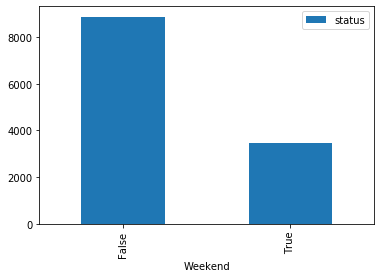

In [49]:
lead_calls1.groupby('Weekend').agg({'status':'count'}).plot.bar()


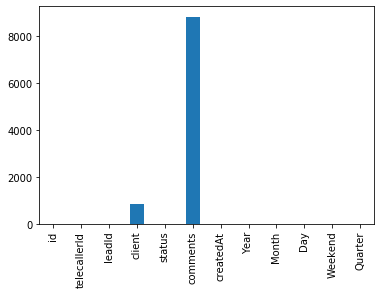

In [50]:
pd.set_option('display.max_rows', 1500)

lead_calls1.isna().sum().plot.bar()

In [0]:
lead_calls1['telecallerId'] = lead_calls1['telecallerId'].apply(lambda x: str(x).replace('fd904600-1e6e-4ab2-8be9-d7903aed9d3d','Sheeba').replace('4248b521-ce3f-4897-a30d-35c9ee81f746','Amila').replace('89b29324-8f3b-4b50-b3f7-0a3e0918e4d2','Rakshith'))

In [227]:
lead_calls1.telecallerId.value_counts()

Sheeba      8770
Amila       3206
Rakshith     359
Name: telecallerId, dtype: int64

In [228]:
leads1.shape

(9188, 10)

In [229]:
lead_calls1.shape

(12335, 12)

In [0]:
final_df= pd.merge(lead_calls1,leads1,how='inner',left_on='leadId',right_on='id')

In [231]:
final_df.head()

,id_x,telecallerId,leadId,client,status,calledAt,createdAt_x,Year,Month,Day,Weekend,Quarter,id_y,name,phoneNumber,city,state,source,isExternal,createdAt_y,receivedAt,diff_cre_rec
0,00028a99-c401-4048-9b75-b923cff55a79,Sheeba,724467a5-52d1-4989-a870-99ae65d3e0e8,Amazon Flex,Not Interested - Applied by Mistake,2019-07-25 17:00:00+00:00,2019-12-26T17:32:49.297Z,2019,7,Thursday,False,Q3,724467a5-52d1-4989-a870-99ae65d3e0e8,Shrinivas,1234567890,Bangalore,Karnataka,Reused Leads,False,2019-12-26T17:32:49.009Z,2019-02-24T00:00:00Z,305 days 17:32:49.009000
1,00033b17-3a2a-4769-8623-bb00adf1e4c5,Amila,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,2019-10-10 17:30:00+00:00,2019-12-26T18:09:38.408Z,2019,10,Thursday,False,Q3,65d4429f-cb34-436d-9020-1fd6f364367f,Karthick,1234567890,Bangalore,Karnataka,Referrals,False,2019-12-26T18:09:35.757Z,2019-10-09T20:18:00Z,77 days 21:51:35.757000
2,1b5dd7ea-34a4-45e1-a7b0-7c712bc2d366,Amila,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,Switched Off/Not Reachable/No Incoming,2019-10-15 11:30:00+00:00,2019-12-26T18:09:40.426Z,2019,10,Tuesday,False,Q3,65d4429f-cb34-436d-9020-1fd6f364367f,Karthick,1234567890,Bangalore,Karnataka,Referrals,False,2019-12-26T18:09:35.757Z,2019-10-09T20:18:00Z,77 days 21:51:35.757000
3,31db5477-aa6a-4935-a177-39bcace3e19d,Amila,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,Not Interested - Wrong Number,2019-10-17 15:30:00+00:00,2019-12-26T18:09:41.241Z,2019,10,Thursday,False,Q3,65d4429f-cb34-436d-9020-1fd6f364367f,Karthick,1234567890,Bangalore,Karnataka,Referrals,False,2019-12-26T18:09:35.757Z,2019-10-09T20:18:00Z,77 days 21:51:35.757000
4,0003dcc7-05d0-4736-a415-5e67ea95c24e,Sheeba,fea7fb85-3355-4747-98fd-dae1b9aca52a,Lalamove,Not Interested - Disconnected the Call,2019-08-30 14:00:00+00:00,2019-12-26T17:42:55.007Z,2019,8,Friday,True,Q3,fea7fb85-3355-4747-98fd-dae1b9aca52a,Kamaram Ramesh,1234567890,Hyderabad,Telangana,Facebook,False,2019-12-26T17:42:54.295Z,2019-08-21T00:00:00Z,127 days 17:42:54.295000


In [0]:
final_df = final_df.rename(columns={'telecallerID':'telecallerName'})

In [232]:
df = final_df.drop(['id_x','id_y','leadId','createdAt_x','createdAt_y','phoneNumber'],axis=1)
df.head()

,telecallerId,client,status,calledAt,Year,Month,Day,Weekend,Quarter,name,city,state,source,isExternal,receivedAt,diff_cre_rec
0,Sheeba,Amazon Flex,Not Interested - Applied by Mistake,2019-07-25 17:00:00+00:00,2019,7,Thursday,False,Q3,Shrinivas,Bangalore,Karnataka,Reused Leads,False,2019-02-24T00:00:00Z,305 days 17:32:49.009000
1,Amila,KFC,RNR,2019-10-10 17:30:00+00:00,2019,10,Thursday,False,Q3,Karthick,Bangalore,Karnataka,Referrals,False,2019-10-09T20:18:00Z,77 days 21:51:35.757000
2,Amila,KFC,Switched Off/Not Reachable/No Incoming,2019-10-15 11:30:00+00:00,2019,10,Tuesday,False,Q3,Karthick,Bangalore,Karnataka,Referrals,False,2019-10-09T20:18:00Z,77 days 21:51:35.757000
3,Amila,KFC,Not Interested - Wrong Number,2019-10-17 15:30:00+00:00,2019,10,Thursday,False,Q3,Karthick,Bangalore,Karnataka,Referrals,False,2019-10-09T20:18:00Z,77 days 21:51:35.757000
4,Sheeba,Lalamove,Not Interested - Disconnected the Call,2019-08-30 14:00:00+00:00,2019,8,Friday,True,Q3,Kamaram Ramesh,Hyderabad,Telangana,Facebook,False,2019-08-21T00:00:00Z,127 days 17:42:54.295000


In [0]:
df['diff_callvrecieve'] = pd.to_datetime(df['calledAt'])-pd.to_datetime(df['receivedAt'])

In [236]:
df.columns

Index(['telecallerId', 'client', 'status', 'calledAt', 'Year', 'Month', 'Day',
       'Weekend', 'Quarter', 'name', 'city', 'state', 'source', 'isExternal',
       'receivedAt', 'diff_cre_rec', 'diff_callvrecieve'],
      dtype='object')

In [0]:
df_unique = df.drop_duplicates(keep='last')

In [255]:
df_unique[df_unique.duplicated()==True]

,telecallerId,client,status,calledAt,Year,Month,Day,Weekend,Quarter,name,city,state,source,isExternal,receivedAt,diff_cre_rec,diff_callvrecieve


In [256]:
df_unique.shape

(11492, 17)

In [257]:
#pd.set_option('display.max_rows', 12000)

df_unique['status'] = df_unique['status'].apply(lambda x:'Invalid Number' if 'number' in str(x).lower() else x )
df_unique['status'] = df_unique['status'].apply(lambda x:'Not Interested' if 'not interested' in str(x).lower() else x )
df_unique['status'] = df_unique['status'].apply(lambda x:'CNP' if 'switched off/not reachable' in str(x).lower() else x )
df_unique['status'] = df_unique['status'].apply(lambda x:'CNP' if 'cnp' in str(x).lower() else x )
df_unique['status'] = df_unique['status'].apply(lambda x:'RNR' if 'rnr' in str(x).lower() else x )
df_unique['status'] = df_unique['status'].apply(lambda x:'Interested' if 'interested ' in str(x).lower() else x )
df_unique['status'] = df_unique['status'].apply(lambda x:'Interested' if 'want ' in str(x).lower() else x )

df_unique['status'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



CNP                         4121
Not Interested              2689
Invalid Number              1129
Very Interested              734
RNR                          572
Interested                   542
Not Applied                  325
Don't Meet Requirements      249
Disconnected the Call        249
Other Reasons                237
Not Sure                     113
Joined                       112
Got Other Jobs                98
Language Barrier              81
Location Issue                73
Applied for Someone Else      54
Applied by Mistake            39
Call Back                     29
Not sure                      29
Disconnected the call         13
Location issue                 2
Applied by mistake             2
Name: status, dtype: int64

In [258]:
df_unique.head()

,telecallerId,client,status,calledAt,Year,Month,Day,Weekend,Quarter,name,city,state,source,isExternal,receivedAt,diff_cre_rec,diff_callvrecieve
0,Sheeba,Amazon Flex,Not Interested,2019-07-25 17:00:00+00:00,2019,7,Thursday,False,Q3,Shrinivas,Bangalore,Karnataka,Reused Leads,False,2019-02-24T00:00:00Z,305 days 17:32:49.009000,151 days 17:00:00
1,Amila,KFC,RNR,2019-10-10 17:30:00+00:00,2019,10,Thursday,False,Q3,Karthick,Bangalore,Karnataka,Referrals,False,2019-10-09T20:18:00Z,77 days 21:51:35.757000,0 days 21:12:00
2,Amila,KFC,CNP,2019-10-15 11:30:00+00:00,2019,10,Tuesday,False,Q3,Karthick,Bangalore,Karnataka,Referrals,False,2019-10-09T20:18:00Z,77 days 21:51:35.757000,5 days 15:12:00
3,Amila,KFC,Invalid Number,2019-10-17 15:30:00+00:00,2019,10,Thursday,False,Q3,Karthick,Bangalore,Karnataka,Referrals,False,2019-10-09T20:18:00Z,77 days 21:51:35.757000,7 days 19:12:00
4,Sheeba,Lalamove,Not Interested,2019-08-30 14:00:00+00:00,2019,8,Friday,True,Q3,Kamaram Ramesh,Hyderabad,Telangana,Facebook,False,2019-08-21T00:00:00Z,127 days 17:42:54.295000,9 days 14:00:00


In [0]:
df_unique = df_unique.drop(['calledAt','receivedAt'],axis=1)

In [249]:
x = '305 days 17:32:49.009000'	
x[0:3]

'305'

In [0]:
df

In [0]:
df_unique['diff_callvrecieve'] = df_unique['diff_callvrecieve'].apply(lambda x: str(x)[0:3].replace('d',''))
df_unique['diff_cre_rec'] = df_unique['diff_cre_rec'].apply(lambda x: str(x)[0:3].replace('d',''))


In [261]:
df_unique.head()

,telecallerId,client,status,Year,Month,Day,Weekend,Quarter,name,city,state,source,isExternal,diff_cre_rec,diff_callvrecieve
0,Sheeba,Amazon Flex,Not Interested,2019,7,Thursday,False,Q3,Shrinivas,Bangalore,Karnataka,Reused Leads,False,305,151
1,Amila,KFC,RNR,2019,10,Thursday,False,Q3,Karthick,Bangalore,Karnataka,Referrals,False,77,0
2,Amila,KFC,CNP,2019,10,Tuesday,False,Q3,Karthick,Bangalore,Karnataka,Referrals,False,77,5
3,Amila,KFC,Invalid Number,2019,10,Thursday,False,Q3,Karthick,Bangalore,Karnataka,Referrals,False,77,7
4,Sheeba,Lalamove,Not Interested,2019,8,Friday,True,Q3,Kamaram Ramesh,Hyderabad,Telangana,Facebook,False,127,9


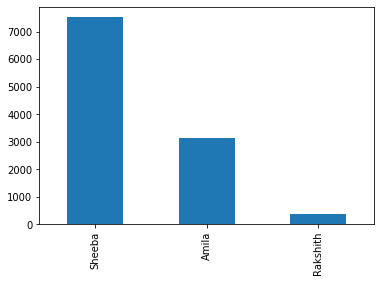

In [0]:
df_unique['telecallerId'].value_counts().plot.bar()

In [92]:
#Key Performance Indicatore
# MErge the tables
#Create the model
# Work on status category
#Clustering for better insights.

telecallerName    0.000000
client            4.516188
status            0.000000
Year              0.000000
Month             0.000000
Day               0.000000
Weekend           0.000000
Quarter           0.000000
name              0.000000
city              0.000000
state             0.000000
source            0.000000
isExternal        0.000000
dtype: float64

In [262]:
df_unique.client.mode()[0]

'Zomato'

In [0]:
df_unique['client'] = df_unique['client'].fillna(df_unique.client.mode()[0])

In [264]:
df_unique.isna().sum()

telecallerId         0
client               0
status               0
Year                 0
Month                0
Day                  0
Weekend              0
Quarter              0
name                 0
city                 0
state                0
source               0
isExternal           0
diff_cre_rec         0
diff_callvrecieve    0
dtype: int64

In [105]:
df_unique.client.value_counts()

Zomato          5596
Swiggy          2100
Uber Eats        628
1 MG             324
Rapido           313
Amazon Flex      262
Dunzo            232
Lynk             217
Random           207
Uber eats        202
Micelio          182
Lalamove         153
Uber             143
Gati             128
BharatPe          93
KFC               92
Micelio (N)       52
Big Basket        33
Grab              27
Move in sync      26
Lynk (N)          16
Gati (L)           1
Name: client, dtype: int64

In [265]:
df_unique.status.value_counts()

CNP                         4121
Not Interested              2689
Invalid Number              1129
Very Interested              734
RNR                          572
Interested                   542
Not Applied                  325
Don't Meet Requirements      249
Disconnected the Call        249
Other Reasons                237
Not Sure                     113
Joined                       112
Got Other Jobs                98
Language Barrier              81
Location Issue                73
Applied for Someone Else      54
Applied by Mistake            39
Call Back                     29
Not sure                      29
Disconnected the call         13
Location issue                 2
Applied by mistake             2
Name: status, dtype: int64

In [266]:
df_unique.columns

Index(['telecallerId', 'client', 'status', 'Year', 'Month', 'Day', 'Weekend',
       'Quarter', 'name', 'city', 'state', 'source', 'isExternal',
       'diff_cre_rec', 'diff_callvrecieve'],
      dtype='object')

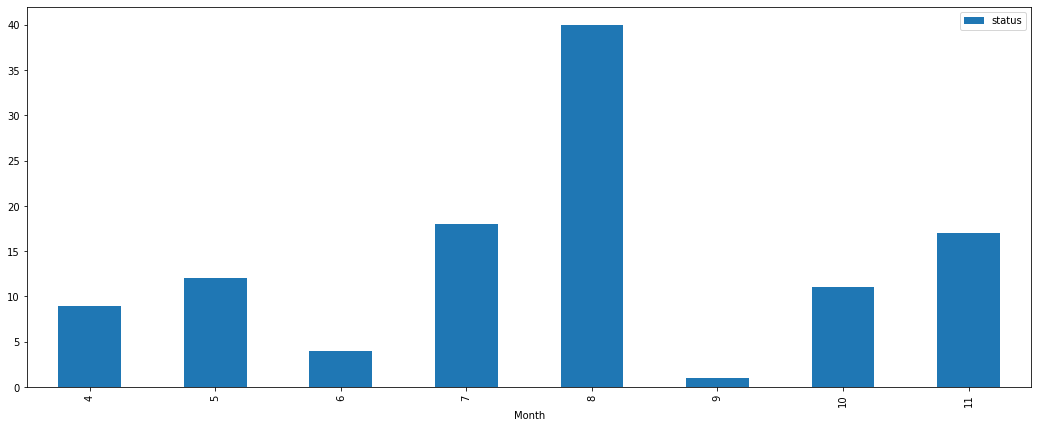

<Figure size 864x360 with 0 Axes>

In [272]:
df_unique[df_unique['status']=='Joined'].groupby('Month').agg({'status':'count'}).plot.bar()
plt.figure(figsize=(12,5))
plt.show()

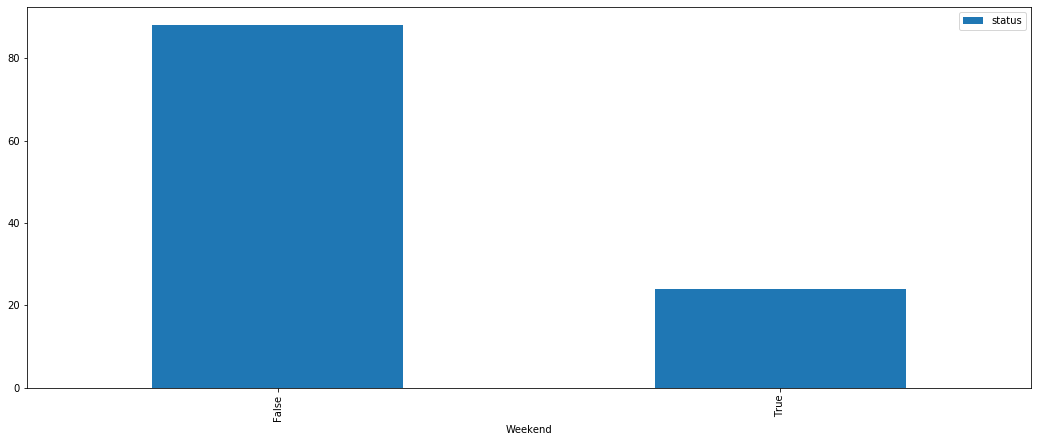

In [273]:
df_unique[df_unique['status']=='Joined'].groupby('Weekend').agg({'status':'count'}).plot.bar()

<Figure size 576x360 with 0 Axes>

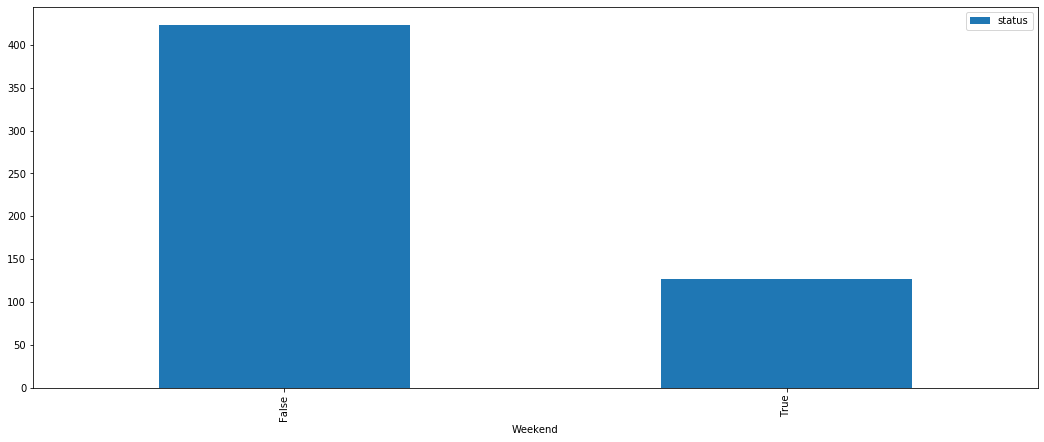

In [159]:
plt.figure(figsize=(8,5))
df_unique[df_unique['status']=='RNR'].groupby('Weekend').agg({'status':'count'}).plot.bar()

In [267]:
df_unique[df_unique['status']=='CNP'].groupby('telecallerName').agg({'status':'count'}).plot.bar()

KeyError: ignored

(array([11.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

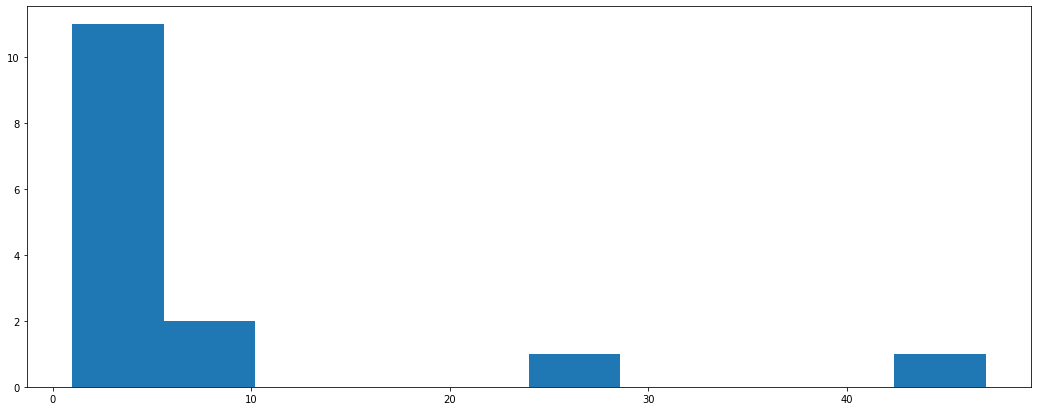

In [169]:
#df_unique[df_unique['status']=='Joined'].groupby('client').agg({'status':'count'}).reset_index(0)['client']


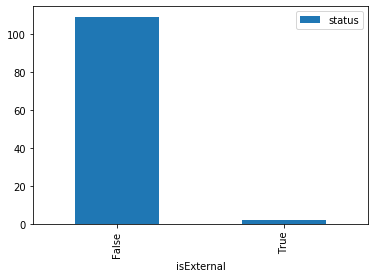

In [133]:
df_unique[df_unique['status']=='Joined'].groupby('isExternal').agg({'status':'count'}).plot.bar()

In [183]:
df_new[df_new['status']=='Joined'].groupby('isExternal').agg({'status':'count'})

,status
isExternal,
False,109
True,2


In [185]:
df_unique[(df_unique['status']=='Interested')|(df_unique['status']=='Very Interested')].groupby('source').agg({'status':'count'})

,status
source,
API,154
BLR,86
Delhi,235
Facebook,125
Others,177
Quikr,39
Referrals,208
Reused Leads,18
Web Chat Referrals,10


In [274]:
df_unique[df_unique['status']=='Joined'].shape[0]

112

In [275]:
df_unique[(df_unique['status']=='Interested')|(df_unique['status']=='Very Interested')].shape[0]

1276

In [0]:
df_unique['tier'] = df['city'].apply(lambda x: 'Tier 1' if x in ['Bangalore','Chennai','Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Ahmedabad','Pune'] else 'Tier 2')
df_new = df_unique.drop(['city','state','Month','Day'],axis=1)

In [279]:
df_new.head()

,telecallerId,client,status,Year,Weekend,Quarter,name,source,isExternal,diff_cre_rec,diff_callvrecieve,tier
0,Sheeba,Amazon Flex,Not Interested,2019,False,Q3,Shrinivas,Reused Leads,False,305,151,Tier 1
1,Amila,KFC,RNR,2019,False,Q3,Karthick,Referrals,False,77,0,Tier 1
2,Amila,KFC,CNP,2019,False,Q3,Karthick,Referrals,False,77,5,Tier 1
3,Amila,KFC,Invalid Number,2019,False,Q3,Karthick,Referrals,False,77,7,Tier 1
4,Sheeba,Lalamove,Not Interested,2019,True,Q3,Kamaram Ramesh,Facebook,False,127,9,Tier 1


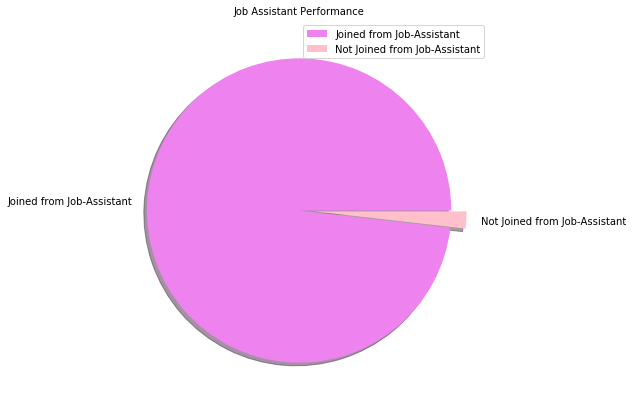

In [269]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [109,2]
colors = ['violet', 'pink']
labels = "Joined from Job-Assistant", "Not Joined from Job-Assistant"
explode = [0,0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True)
plt.title('Job Assistant Performance',fontsize=10)
plt.axis('off')
plt.legend()

# # plotting a pie chart for browsers
# size = [7961, 2462, 736, 467,174, 163, 300]
# colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
# labels = "2", "1","4","5","6","10","others"

# plt.subplot(1, 2, 2)
# plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
# plt.title('Different Browsers', fontsize = 30)
# plt.axis('off')
# plt.legend()
plt.show()

In [0]:
df_unique[(df_unique['status']=='Interested')|(df_unique['status']=='Very Interested')].shape[0]